In [33]:
import field_check as fc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import importlib
importlib.reload(fc)

w=4.7
h=6

mpl.rcParams['figure.figsize'] = [w, h]
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'


In [2]:
e_lens_fish=fc.read_fish('../einzel_lens_T/in/E_maps/super_high_res/e_lens.TXT')
c_lens_fish=fc.read_fish('../einzel_lens_T/in/E_maps/super_high_res/c_lens.TXT')
ext_reg_fish=fc.read_fish('../einzel_lens_T/in/E_maps/super_high_res/ext_reg.TXT')
full_bl=fc.read_fish('../einzel_lens_T/in/E_maps/super_high_res/full_bl.TXT')

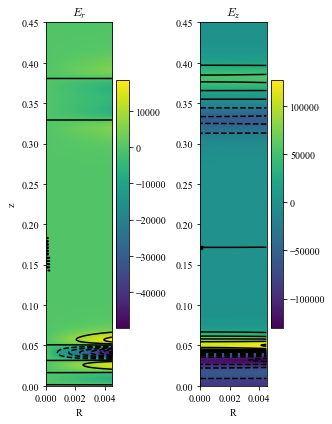

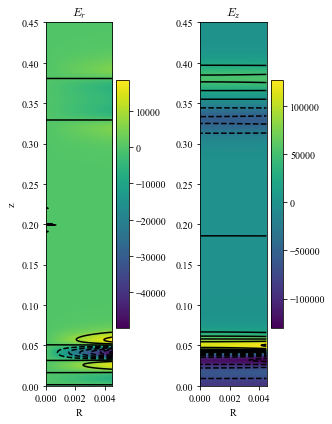

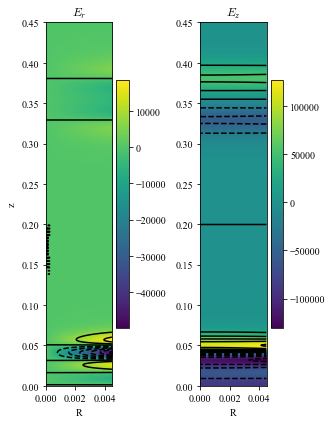

In [38]:
R=np.linspace(1E-6,0.0045,225)
Z=np.linspace(1E-6,0.45,1000)

# sum_fish=fc.add_maps([e_lens_fish,ext_reg_fish,c_lens_fish],[(2000*0.9834-3.5),(-2693.8*0.9783-0.09),(4984.3*0.9787+2.58)])
# sum_fish=fc.crop_map(sum_fish,R,Z)

sum_fish=fc.add_vals([e_lens_fish,ext_reg_fish,c_lens_fish],R,Z,scales=[(2000*0.9834-3.5),(-2693.8*0.9783-0.09),(4984.3*0.9787+2.58)])

full_fish=fc.crop_map(full_bl,R,Z)

GPT=fc.read_GPT('GPT_map.txt')
GPT=fc.crop_map(GPT,R,Z)

fc.plot_map(sum_fish,'Er',saveas='sum_fish.pdf',contour=True)
fc.plot_map(full_fish,'Er',saveas='full_fish.pdf',contour=True)
fc.plot_map(GPT,'Er',saveas='GPT.pdf',contour=True)


In [154]:
GPT.Z.min()

1e-06

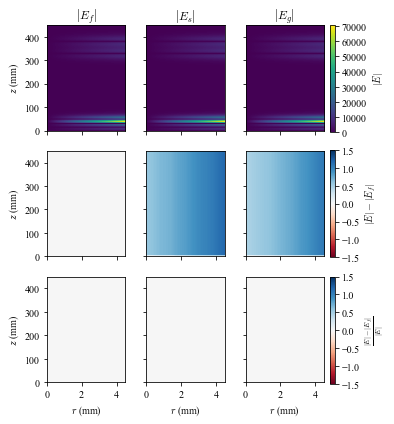

In [144]:
fig,axes=plt.subplots(3,3,sharex=True,sharey=True)

ims=[full_fish,sum_fish,GPT]

mag=[]

for im,ax in zip(ims,axes.T):
    
    mag.append(fc.plot_mag(im,ax[0],contour=False,title='a)'))
    
    diff=fc.diff_map(im,full_fish,R,Z)
    quot=fc.quot_map(diff,full_fish,R,Z)
    d=fc.plot_mag(diff,ax[1],contour=False,title='b)',vmin=-1.5,vmax=1.5,cm='RdBu')
    q=fc.plot_mag(quot,ax[2],contour=False,title='c)',vmin=-1.5,vmax=1.5,cm='RdBu') 
    
titles=['$|E_f|$','$|E_s|$','$|E_g|$']
    
for ax,t in zip(axes.T,titles):
    ax[0].set_title(t)
    ax[2].set_xlabel('$r$ (mm)')

for ax in axes:
    ax[0].set_ylabel('$z$ (mm)')

cbar = fig.colorbar(mag[0][1], ax=axes[0,:],anchor=(2,-.95),shrink=1.12,label='$|E|$')
cbar2 = fig.colorbar(d[1], ax=axes[1,:],anchor=(2,-.1),shrink=1.12,label='$|E|-|E_f|$')
cbar3 = fig.colorbar(q[1], ax=axes[2,:],anchor=(2,.9),shrink=1.12,label='$\\frac{|E|-|E_f|}{|E|}$')
plt.tight_layout()
plt.savefig('super-pos_field_maps.pdf',bbox_inches='tight',extra_artists=[cbar,cbar2,cbar3])

<Figure size 338.4x432 with 0 Axes>

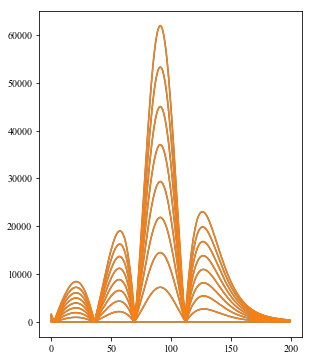

In [25]:
plt.plot(mag[0][:200,::25],c='C0')
plt.plot(mag[1][:200,::25],c='C1')
# plt.plot(mag[2][:200,::25],c='C2')

plt.show()

# plt.plot(mag[0][550::10,:].T,c='C0')
# plt.plot(mag[1][550::10,:].T,c='C1')
# plt.plot(mag[2][550::10,:].T,c='C2')
# plt.ylim([0,200])

# # plt.xlim([0,200])
# plt.show()
# print(mag[0][:,100].argmax())
# print(mag[1][:,100].argmax())
# print(mag[2][:,100].argmax())



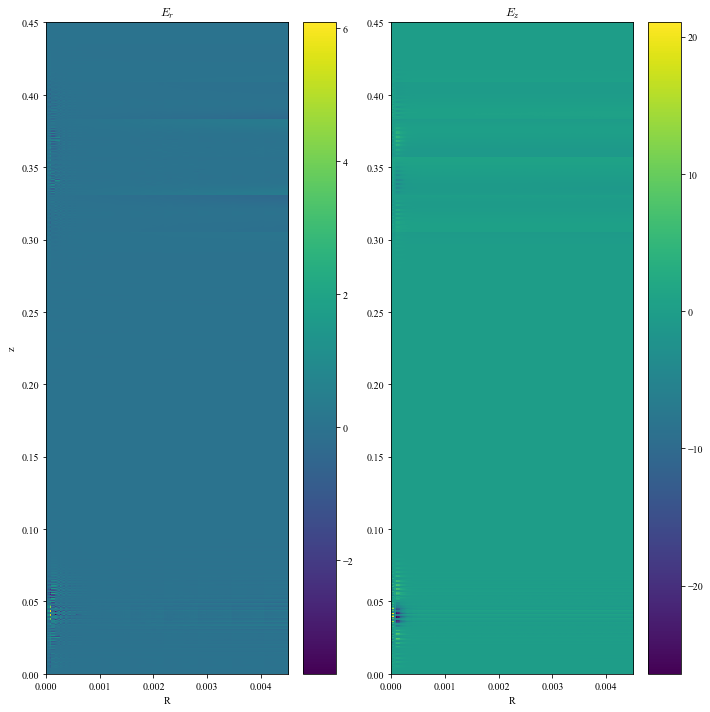

In [30]:
difference_map=fc.diff_map(GPT,full_fish,R,Z)
quotient_map=fc.quot_map(difference_map,full_fish,R,Z)
fc.plot_map(difference_map,'Er',saveas="difference_map.pdf")
# fc.plot_map(quotient_map,'Er',saveas="quotient_map.pdf",vmin=-5,vmax=5)


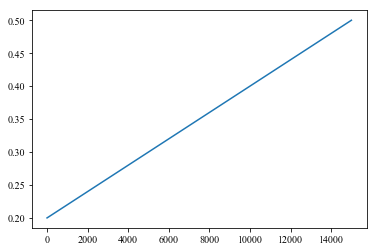

<Figure size 432x288 with 0 Axes>

In [6]:
GPT_e_lens_1k=fc.read_GPT('GPT_scale_e_lens.txt')
fish_e_lens_1k=fc.add_maps([e_lens_fish],[1000])


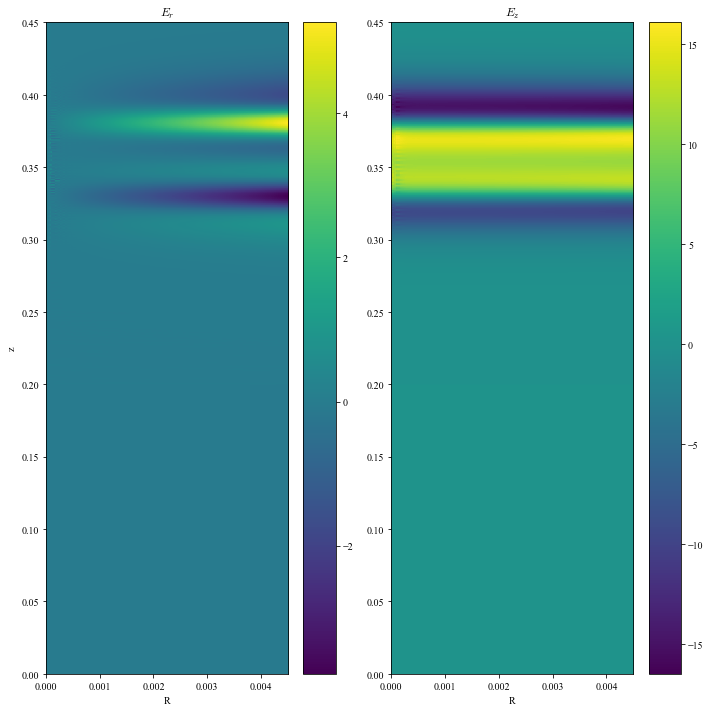

In [7]:
diff_e_lens=fc.diff_map(GPT_e_lens_1k,fish_e_lens_1k,R,Z)
fc.plot_map(diff_e_lens,'Er',saveas="diff_e_lens.pdf")

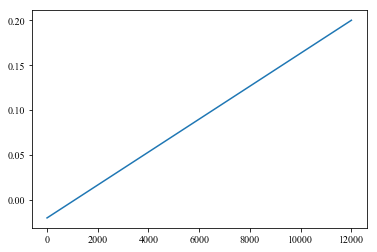

<Figure size 432x288 with 0 Axes>

In [8]:
GPT_c_lens_1k=fc.read_GPT('GPT_scale_c_lens.txt')
fish_c_lens_1k=fc.add_maps([c_lens_fish],[1000])

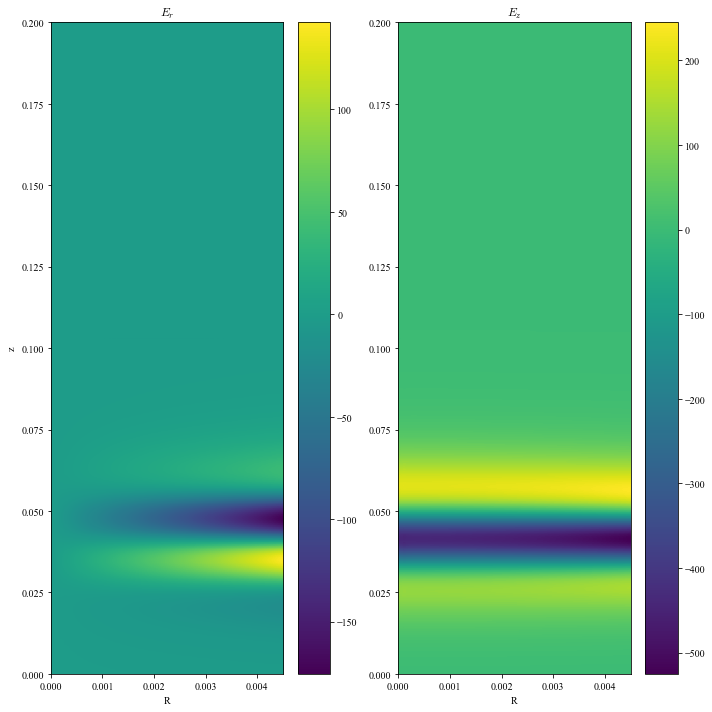

In [9]:
diff_c_lens=fc.diff_map(GPT_c_lens_1k,fish_c_lens_1k,np.linspace(0.000001,0.0045,225),np.linspace(0.000001,0.2,1000))
#quot_c_lens=fc.quot_map(fish_c_lens_1k,GPT_c_lens_1k,np.linspace(0.000001,0.0045,225),np.linspace(0.000001,0.2,1000))
fc.plot_map(diff_c_lens,'Er',saveas="diff_c_lens.pdf")
#fc.plot_map(quot_c_lens,'Er',saveas="quot_c_lens.pdf")

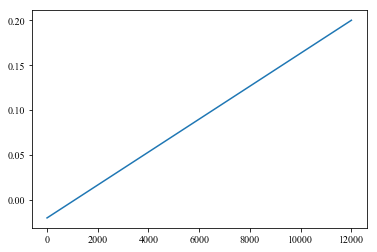

<Figure size 432x288 with 0 Axes>

In [10]:
GPT_ext_reg_1k=fc.read_GPT('GPT_scale_ext_reg.txt')
fish_ext_reg_1k=fc.add_maps([ext_reg_fish],[1000])

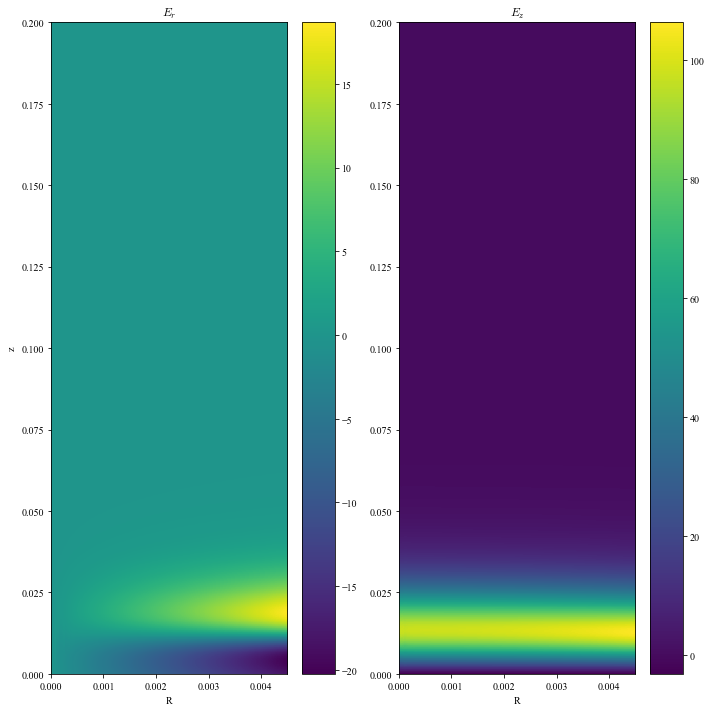

In [11]:
diff_ext_reg=fc.diff_map(GPT_ext_reg_1k,fish_ext_reg_1k,np.linspace(0.000001,0.0045,225),np.linspace(0.000001,0.2,1000))
fc.plot_map(diff_ext_reg,'Er',saveas="diff_ext_reg.pdf")